In [27]:
from zipfile import ZipFile
from utils.download_sample import download_from_dropbox
from utils.coordinate_utils import extract_coordinates, normalize_coords_to_pixel
from utils.imutils import *
from utils.shapely_and_napari_utils import *
from pathlib import Path
import napari
from napari.utils import nbscreenshot
import time
from shapely.geometry import GeometryCollection
from shapely.geometry import Point


In [2]:
%gui qt

In [3]:
time.sleep(1)

In [4]:
if not Path("Stiching_Example_Dataset").exists():
    # Download and extract sample data
    example_dataset="https://www.dropbox.com/s/rhggl54sbpx9llj/Stiching_Example_Dataset.zip?dl=0"
    print("Downloading sample file from dropbox")
    download_from_dropbox(example_dataset, "_sample.zip")
    print("Extracting sample file")
    ZipFile("_sample.zip").extractall()

In [5]:
coords = extract_coordinates("Stiching_Example_Dataset/out.txt")
coords

,name,X,Y,Z,um/px
0,1_0000,3582.7,4164.4,1686.65,0.64
1,1_0001,-12396.6,11719.3,1686.63,0.64
2,1_0002,-13583.0,11726.0,1686.63,0.64
3,1_0003,-14769.3,11732.8,1686.63,0.64
4,1_0004,-15955.6,11739.5,1686.63,0.64
...,...,...,...,...,...
67,1_0067,-16003.1,3370.3,1686.63,0.64
68,1_0068,-14816.8,3363.5,1686.63,0.64
69,1_0069,-13630.5,3356.8,1686.63,0.64
70,1_0070,-12444.2,3350.1,1686.63,0.64


In [6]:
files = sorted(list(Path("Stiching_Example_Dataset").glob("*.jpg")))
files

[PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0000.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0001.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0002.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0003.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0004.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0005.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0006.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0007.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0008.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0009.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0010.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0011.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0012.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0013.jpg'),
 PosixPath('Stiching_Example_Dataset/Well1_Seq0001_1_0014.jpg'),
 PosixPath('Stiching_Exam

In [7]:
normalized_coords=normalize_coords_to_pixel(coords).to_numpy()

In [8]:
v = napari.Viewer()

2021-06-21 16:05:36,544 [INFO] WRITING LOG OUTPUT TO /home/hilsenst/.cellpose/run.log


In [9]:
# skip first image as it is an outlier (stage position wise)
mosaic_layers = []
for file, coord in zip(files[1:], normalized_coords[1:]):
    im = load_image(file)
    im = transpose(select_channel(crop_black_border(im),0))
    layer = v.add_image(im, translate=coord, name=file.stem)
    mosaic_layers.append(layer)

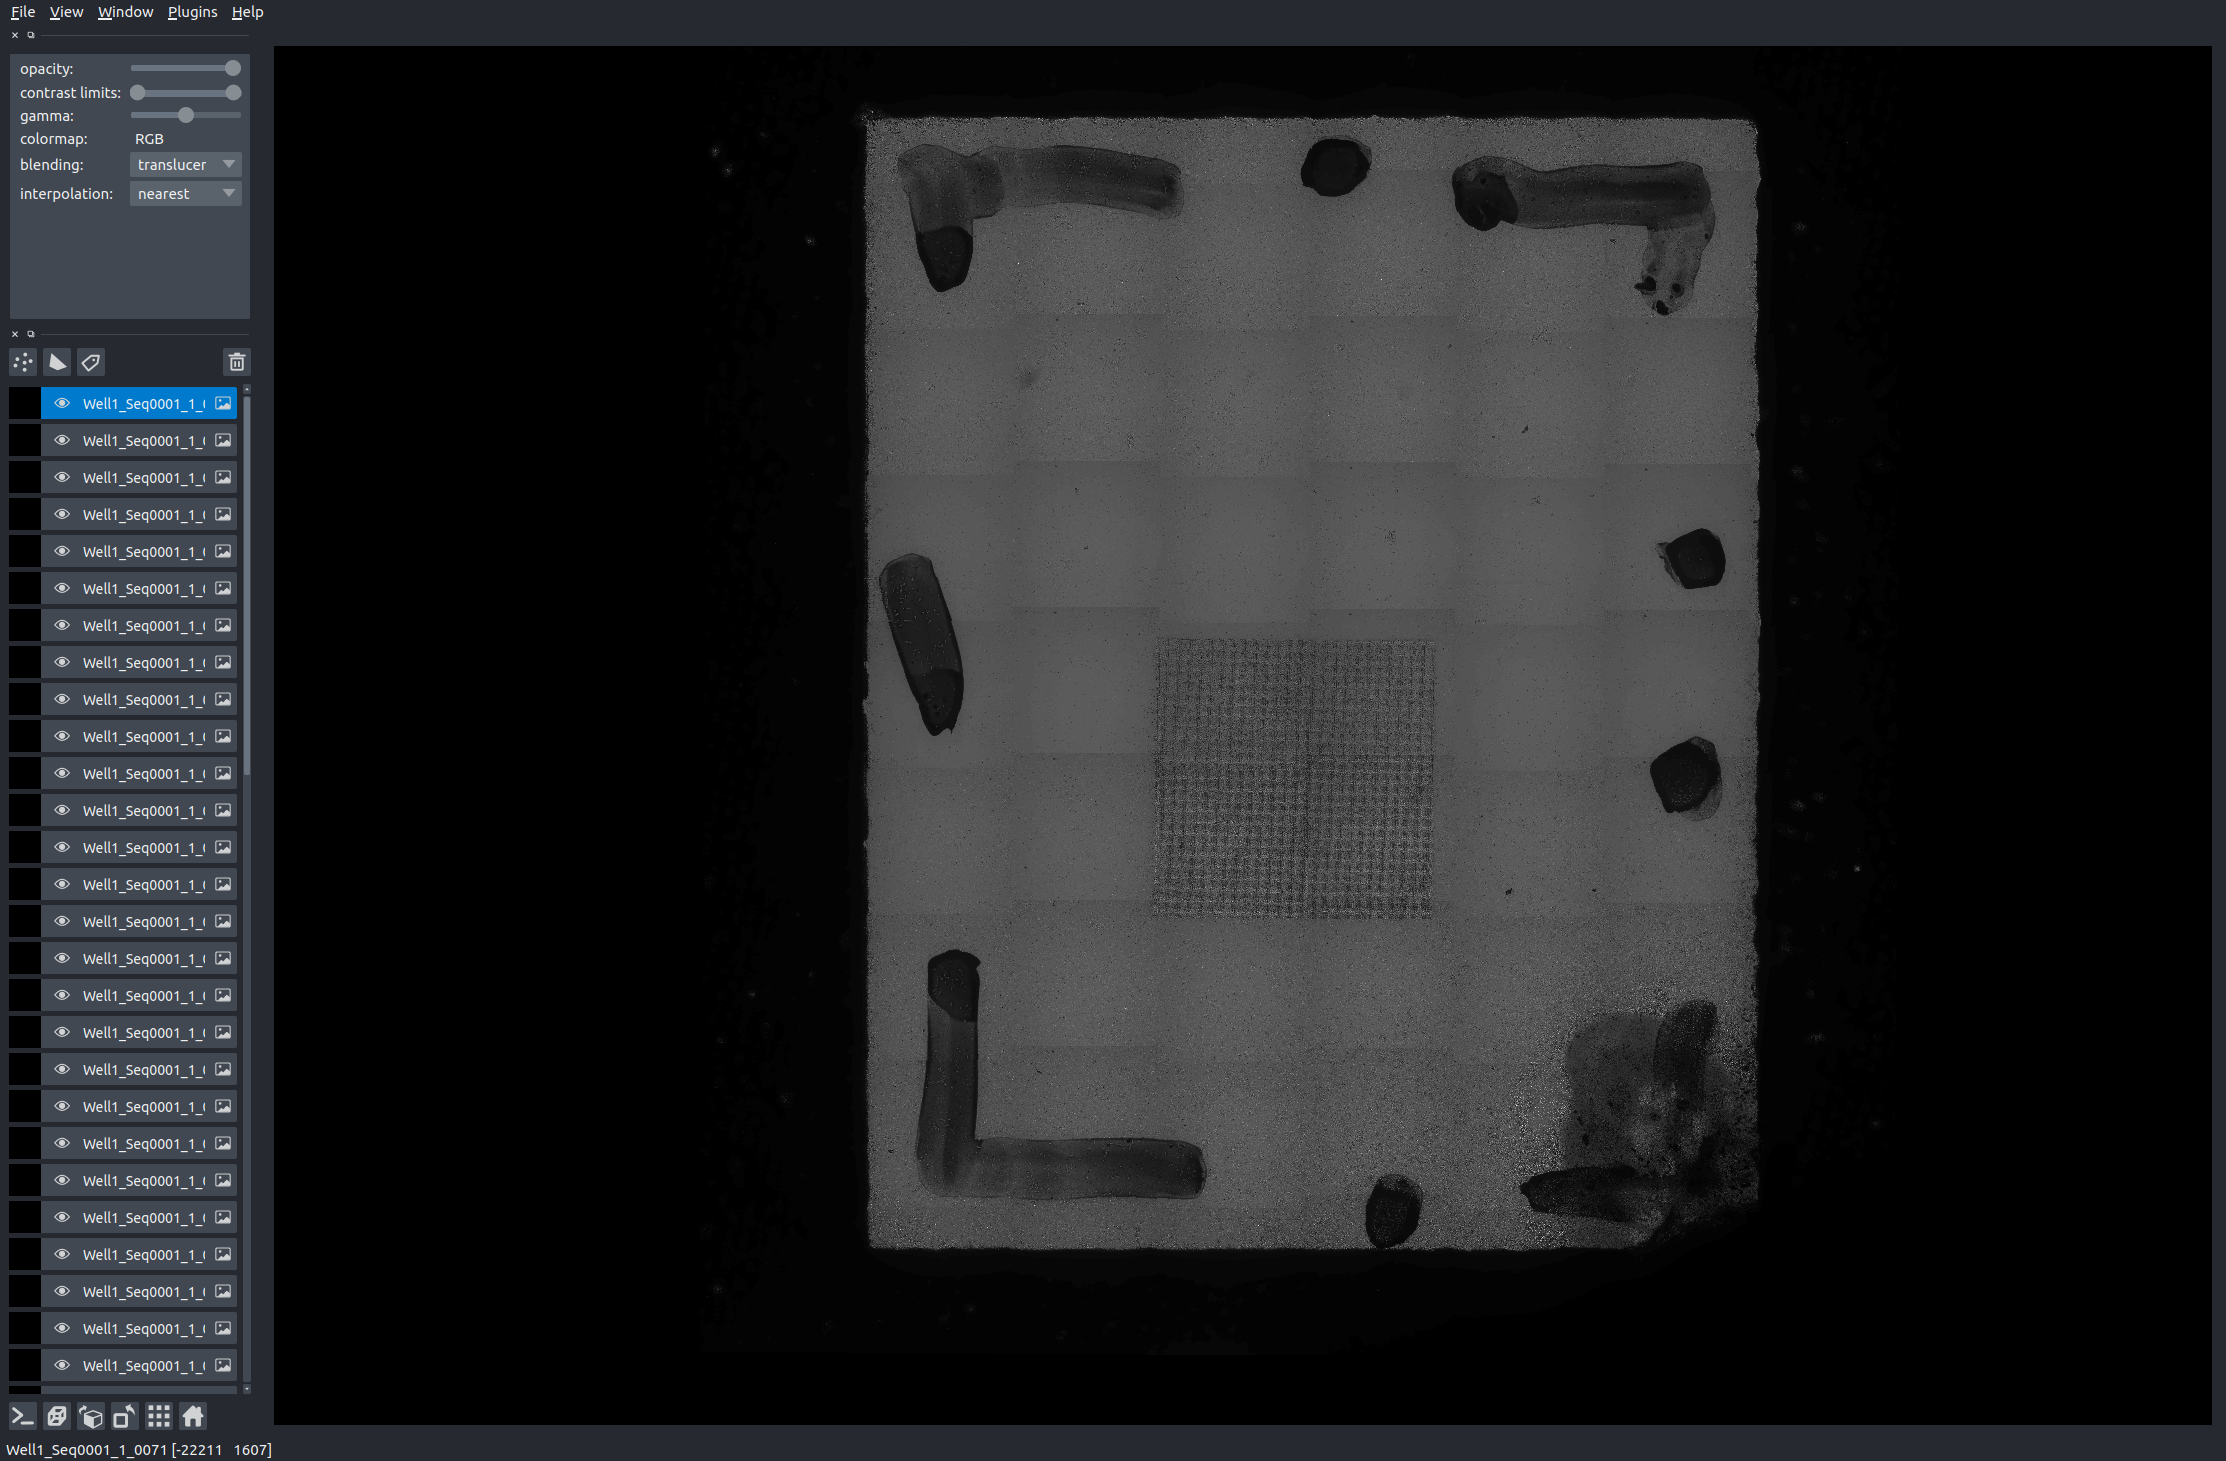

In [10]:
nbscreenshot(v)

In [11]:
for layer in mosaic_layers:
    print(layer.affine.affine_matrix)

[[ 1.00000000e+00  0.00000000e+00 -1.93696875e+04]
 [ 0.00000000e+00  1.00000000e+00  1.83114062e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00 -2.12234375e+04]
 [ 0.00000000e+00  1.00000000e+00  1.83218750e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00 -2.30770312e+04]
 [ 0.00000000e+00  1.00000000e+00  1.83325000e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00 -2.49306250e+04]
 [ 0.00000000e+00  1.00000000e+00  1.83429688e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00 -2.67842188e+04]
 [ 0.00000000e+00  1.00000000e+00  1.83535938e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00 -2.86378125e+04]
 [ 0.00000000e+00  1.00000000e+00  1.83640625e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00 -3.04914062e+04]
 [ 0.00000000e+00  1.0000

In [12]:
for layer in mosaic_layers:
    print(layer.data.shape)
    print(get_image_layer_rect(layer))

(2044, 2048, 1)
[[-19369.6875   18311.40625]
 [-17325.6875   18311.40625]
 [-17325.6875   20359.40625]
 [-19369.6875   20359.40625]]
(2044, 2048, 1)
[[-21223.4375  18321.875 ]
 [-19179.4375  18321.875 ]
 [-19179.4375  20369.875 ]
 [-21223.4375  20369.875 ]]
(2044, 2048, 1)
[[-23077.03125  18332.5    ]
 [-21033.03125  18332.5    ]
 [-21033.03125  20380.5    ]
 [-23077.03125  20380.5    ]]
(2044, 2048, 1)
[[-24930.625    18342.96875]
 [-22886.625    18342.96875]
 [-22886.625    20390.96875]
 [-24930.625    20390.96875]]
(2044, 2048, 1)
[[-26784.21875  18353.59375]
 [-24740.21875  18353.59375]
 [-24740.21875  20401.59375]
 [-26784.21875  20401.59375]]
(2044, 2048, 1)
[[-28637.8125  18364.0625]
 [-26593.8125  18364.0625]
 [-26593.8125  20412.0625]
 [-28637.8125  20412.0625]]
(2044, 2048, 1)
[[-30491.40625  18374.53125]
 [-28447.40625  18374.53125]
 [-28447.40625  20422.53125]
 [-30491.40625  20422.53125]]
(2044, 2048, 1)
[[-32345.15625  18385.15625]
 [-30301.15625  18385.15625]
 [-30301.15

Find oriented bounding boxes:

In [15]:
# find min/max x,y coordinates across all bounding boxes
oriented_bboxes=[]
for layer in mosaic_layers:
    oriented_bboxes.append(get_image_layer_rect(layer))

In [16]:
s=v.add_shapes(oriented_bboxes, name="bboxes of mosaic layers")


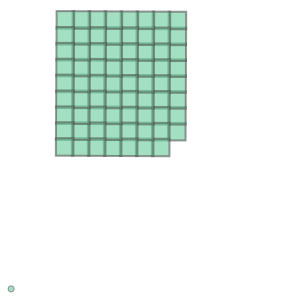

In [30]:
mosaic = napari_shape_layer_to_shapely(s)
origin = Point(0,0)
GeometryCollection((origin, mosaic))

In [18]:
all_bboxes = np.vstack(oriented_bboxes)

In [19]:
# minimum extents
all_min = all_bboxes.min(axis=0)
all_min

array([-32419.375  ,   5223.90625])

In [20]:
# maximum extents
all_max = all_bboxes.max(axis=0)
all_max

array([-15482.71875,  20433.15625])

In [21]:
# total extents shape
all_max - all_min

array([16936.65625, 15209.25   ])

In [40]:
stitched_shape=np.ceil(all_max-all_min).astype(np.int)
stitched_shape

array([16937, 15210])

In [ ]:
# translate all mosaic layers such that they are at the origin

In [23]:
from skimage.transform import AffineTransform

In [24]:
shift_to_origin = AffineTransform(translation=-all_min)
shift_to_origin.params

array([[ 1.00000000e+00, -0.00000000e+00,  3.24193750e+04],
       [ 0.00000000e+00,  1.00000000e+00, -5.22390625e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [25]:
# shift all layers of mosaic
for layer in mosaic_layers:
    layer.affine = layer.affine.affine_matrix @ shift_to_origin

In [26]:
# find min/max x,y coordinates across all bounding boxes
oriented_bboxes=[]
for layer in mosaic_layers:
    oriented_bboxes.append(get_image_layer_rect(layer))

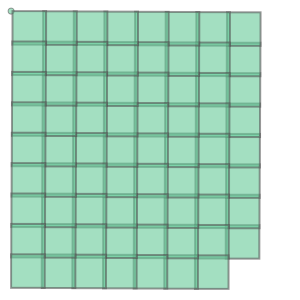

In [33]:
# find min/max x,y coordinates across all bounding boxes
oriented_bboxes=[]
for layer in mosaic_layers:
    oriented_bboxes.append(get_image_layer_rect(layer))
s_shifted = v.add_shapes(oriented_bboxes, name="bboxes after shift")
mosaic_shifted = napari_shape_layer_to_shapely(s_shifted)
origin = Point(0,0)
GeometryCollection((origin, mosaic_shifted))

In [34]:
import dask.array as da

In [41]:
target_array = da.from_array(np.zeros(stitched_shape, dtype=np.uint16), chunks=(4000, 4000))

In [42]:
target_array.chunks

((4000, 4000, 4000, 4000, 937), (4000, 4000, 4000, 3210))

In [85]:
tuple(map(sum, target_array.chunks))

(16937, 15210)

In [94]:
def print_chunk_slices(arr: da.core.Array):
    """ given a dask array print a string representation for
    the slices for the individual chunks.
    
    There is probably a more elegant way to do this."""
    chunksy, chunksx = target_array.chunks
    y=0
    for cy in chunksy:
        x =0 
        for cx in chunksx:
            print(f"[{y}:{y+cy}, {x}:{x+cx}]")
            x = x + cx
        y=y + cy

In [95]:
print_chunk_slices(target_array)

[0:4000, 0:4000]
[0:4000, 4000:8000]
[0:4000, 8000:12000]
[0:4000, 12000:15210]
[4000:8000, 0:4000]
[4000:8000, 4000:8000]
[4000:8000, 8000:12000]
[4000:8000, 12000:15210]
[8000:12000, 0:4000]
[8000:12000, 4000:8000]
[8000:12000, 8000:12000]
[8000:12000, 12000:15210]
[12000:16000, 0:4000]
[12000:16000, 4000:8000]
[12000:16000, 8000:12000]
[12000:16000, 12000:15210]
[16000:16937, 0:4000]
[16000:16937, 4000:8000]
[16000:16937, 8000:12000]
[16000:16937, 12000:15210]


In [102]:
def chunk_slices(arr: da.core.Array):
    """ given a dask array print a string representation for
    the slices for the individual chunks.
    
    There is probably a more elegant way to do this."""
    chunksy, chunksx = target_array.chunks
    y=0
    for cy in chunksy:
        x =0 
        for cx in chunksx:
            yield((y,y+cy), (x,x+cx))
            x = x + cx
        y=y + cy

In [112]:
a = chunk_slices(target_array)

In [113]:
a

<generator object chunk_slices at 0x7f7b42143f50>

In [114]:
next(a)

((0, 4000), (0, 4000))

In [117]:
def get_rect_from_chunk_slice(chunk_slice):
    ylim, xlim = chunk_slice
    miny, maxy = ylim[0], ylim[1]-1
    minx, maxx = xlim[0], xlim[1]-1
    return np.array([[miny, minx],[maxy, minx], [maxy, maxx], [miny,maxx]])

In [118]:
chunk_shapes = list(map(get_rect_from_chunk_slice, chunk_slices(target_array)))

In [119]:
chunk_shapes

[array([[   0,    0],
        [3999,    0],
        [3999, 3999],
        [   0, 3999]]),
 array([[   0, 4000],
        [3999, 4000],
        [3999, 7999],
        [   0, 7999]]),
 array([[    0,  8000],
        [ 3999,  8000],
        [ 3999, 11999],
        [    0, 11999]]),
 array([[    0, 12000],
        [ 3999, 12000],
        [ 3999, 15209],
        [    0, 15209]]),
 array([[4000,    0],
        [7999,    0],
        [7999, 3999],
        [4000, 3999]]),
 array([[4000, 4000],
        [7999, 4000],
        [7999, 7999],
        [4000, 7999]]),
 array([[ 4000,  8000],
        [ 7999,  8000],
        [ 7999, 11999],
        [ 4000, 11999]]),
 array([[ 4000, 12000],
        [ 7999, 12000],
        [ 7999, 15209],
        [ 4000, 15209]]),
 array([[ 8000,     0],
        [11999,     0],
        [11999,  3999],
        [ 8000,  3999]]),
 array([[ 8000,  4000],
        [11999,  4000],
        [11999,  7999],
        [ 8000,  7999]]),
 array([[ 8000,  8000],
        [11999,  8000],
    

In [123]:
chunklayer = v.add_shapes(chunk_shapes, name="dask chunks", edge_color='red')

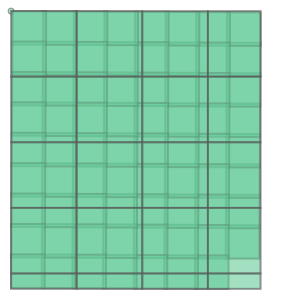

In [126]:
GeometryCollection([origin, mosaic_shifted,napari_shape_layer_to_shapely(chunklayer)])